Objective:

Target High value customers based on customer Demographics and Attributes and find top 1000 customers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
tranx = pd.read_excel('clustering.xlsx', sheet_name = 'Transactions')
new_cust = pd.read_excel('clustering.xlsx', sheet_name = 'NewCustomerList')
c_demo = pd.read_excel('clustering.xlsx', sheet_name = 'CustomerDemographic')
c_add = pd.read_excel('clustering.xlsx', sheet_name = 'CustomerAddress')

In [3]:
tranx.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [4]:
print('Shape of Transactions table is: {}'.format(tranx.shape))

Shape of Transactions table is: (20000, 13)


In [5]:
tranx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [6]:
tranx.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [7]:
for features in tranx.columns:
    print(tranx[features].value_counts())
    print('-' * 100)

2047     1
10912    1
12947    1
2708     1
661      1
        ..
7481     1
1338     1
3387     1
13628    1
2049     1
Name: transaction_id, Length: 20000, dtype: int64
----------------------------------------------------------------------------------------------------
0      1378
3       354
1       311
35      268
38      267
       ... 
71      137
8       136
16      136
100     130
47      121
Name: product_id, Length: 101, dtype: int64
----------------------------------------------------------------------------------------------------
2183    14
1068    14
2476    14
2072    13
1672    13
        ..
2395     1
1569     1
1203     1
2271     1
1544     1
Name: customer_id, Length: 3494, dtype: int64
----------------------------------------------------------------------------------------------------
2017-02-14    82
2017-08-18    82
2017-10-15    76
2017-01-31    73
2017-12-19    71
              ..
2017-01-12    38
2017-12-07    37
2017-03-29    36
2017-09-25    35
2017-10-19   

online_order is a binary feature with 1 and 0, where 1 might depict order being online and 0 of order not being online. Convert online_order to a categorical feature. product_first_sold_date is of float datatype whereas it should be of datetime datatype. Convert it to datetime feature.

In [8]:
tranx['online_order'].value_counts()

1.0    9829
0.0    9811
Name: online_order, dtype: int64

In [9]:
tranx.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

Some of the features have null values. Since these null values are less than 2% of all data we will straight away impute them.

In [10]:
fnum = []
fob = []
for features in tranx.columns:
    if (tranx[features].isnull().sum() > 1) & (tranx[features].dtype != 'O'):
        fnum.append(features)
    elif (tranx[features].isnull().sum() > 1) & (tranx[features].dtype == 'O'):
        fob.append(features)
print('fnum: ', fnum)
print('fob: ', fob)
# impute numeric features with median
# impute categorical features with most frequent value
for features in fnum:
    tranx[features].fillna(tranx[features].median(), inplace = True)
for features in fob:
    tranx[features].fillna(tranx[features].value_counts().index[0], inplace = True)

fnum:  ['online_order', 'standard_cost', 'product_first_sold_date']
fob:  ['brand', 'product_line', 'product_class', 'product_size']


In [11]:
tranx.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

So all null values have been imputed.

In [12]:
# Let's change datatype for online_order and product_first_sold_date
tranx['online_order'] = tranx['online_order'].astype(str)
print('online_order: ' ,tranx['online_order'].dtype)
tranx['product_first_sold_date'] = pd.to_datetime(tranx['product_first_sold_date'])
print('product_first_sold_date: ' ,tranx['product_first_sold_date'].dtype)

online_order:  object
product_first_sold_date:  datetime64[ns]


In [13]:
# We can create a new feature Profit
tranx['Profit'] = tranx['list_price'] - tranx['standard_cost']

In [14]:
tranx.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 00:00:00.000041245,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 00:00:00.000041701,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 00:00:00.000036361,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 00:00:00.000036145,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 00:00:00.000042226,1055.82


In [15]:
# Checking unique values in transaction_id, product_id, customer_id
fts = ['transaction_id', 'product_id', 'customer_id']
for features in fts:
    print(features, tranx[features].unique())

transaction_id [    1     2     3 ... 19998 19999 20000]
product_id [  2   3  37  88  78  25  22  15  67  12   5  61  35  16  79  33  54  27
  82  89  64  19  72  91   1  99   0  92  14  44  76  46  55  66  81  86
  32  77  96   6  47  94  93  60  28   4  38  56  58  50  80  87  84  21
  31  62  17  73  45  49  95  18  70  26  39  36  98  75  42  20  24  53
  65  29  11  10   7  41   9  69  90  97 100  74  71  34  57  23  51  59
  63  40   8  13  30  48  68  83  43  52  85]
customer_id [2950 3120  402 ...  130 2789 3446]


In [16]:
tranx['customer_id'].describe()

count    20000.000000
mean      1738.246050
std       1011.951046
min          1.000000
25%        857.750000
50%       1736.000000
75%       2613.000000
max       5034.000000
Name: customer_id, dtype: float64

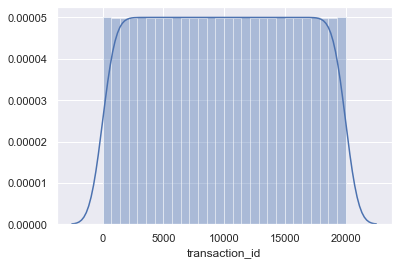

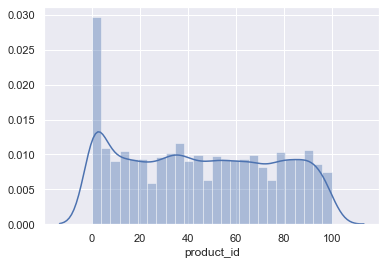

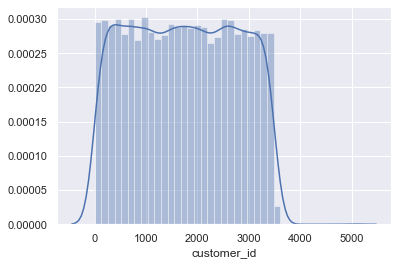

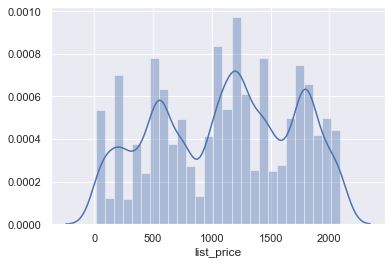

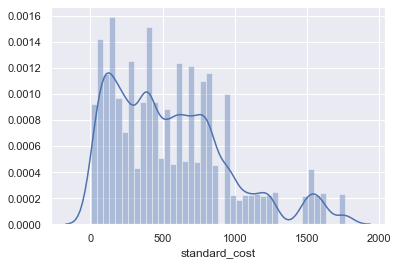

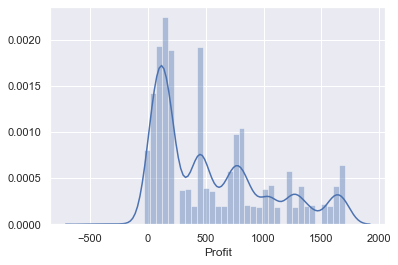

In [17]:
# Checking distribution of numeric features
sns.set()
for features in tranx.columns:
    if tranx[features].dtype == 'int64' or tranx[features].dtype == 'float64':
        sns.distplot(tranx[features])
        plt.xlabel(features)
        plt.show()

In [18]:
# Removing customer id greater than 4000.
ix = tranx[tranx['customer_id'] > 4000].index
tranx.drop(ix, axis = 0, inplace = True)

In [19]:
tranx['customer_id'].describe()
# so we will keep customer ids upto 3500

count    19997.000000
mean      1737.751613
std       1011.221384
min          1.000000
25%        857.000000
50%       1736.000000
75%       2613.000000
max       3500.000000
Name: customer_id, dtype: float64

### Bivariate Analysis

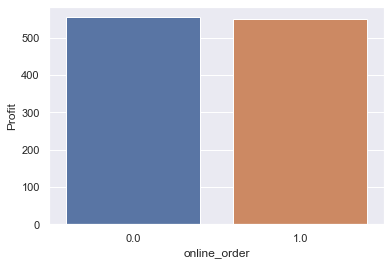

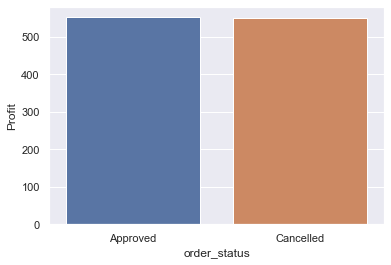

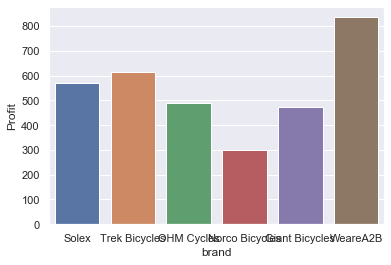

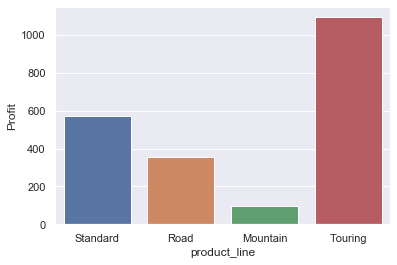

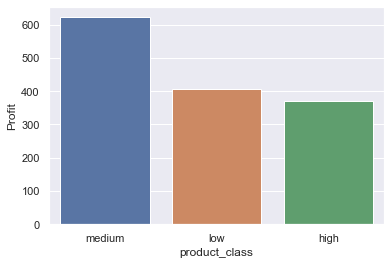

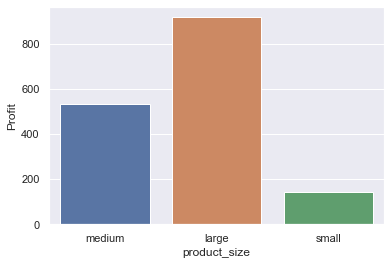

In [20]:
for features in tranx.columns:
    if tranx[features].dtype == 'O':
        sns.barplot(tranx[features], tranx['Profit'], ci = None)
        plt.xlabel(features)
        plt.ylabel('Profit')
        plt.show()

Observations
- Profit is almost same for both classes of online_order and order_status.
- Profit is highest for Weare A2B brand whereas lowest is for Norco Bicycles.
- Among product_line Touring has highest profit whereas Mountain has lowest.
- Medium product class has highest profit and large product size has highest profit.

### New Customer List

In [21]:
new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.50,0.625,0.78125,0.664062,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.82,0.820,1.02500,0.871250,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.68,0.680,0.68000,0.680000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,1.02,1.275,1.27500,1.275000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.96,0.960,1.20000,1.200000,4,4,1.703125


In [22]:
new_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [23]:
for features in new_cust.columns:
    print(new_cust[features].value_counts())
    print('-' * 100)

Dorian       3
Mandie       3
Rozamond     3
Kippar       2
Morganica    2
            ..
Janaye       1
Fara         1
Lucien       1
Solomon      1
Hanson       1
Name: first_name, Length: 940, dtype: int64
----------------------------------------------------------------------------------------------------
Sissel        2
Burgoine      2
Sturch        2
Eade          2
Borsi         2
             ..
Cogger        1
Chilcott      1
Hatch         1
Pauncefort    1
Budden        1
Name: last_name, Length: 961, dtype: int64
----------------------------------------------------------------------------------------------------
Female    513
Male      470
U          17
Name: gender, dtype: int64
----------------------------------------------------------------------------------------------------
60    20
59    18
70    17
42    17
37    16
      ..
19     5
9      5
92     5
85     4
20     3
Name: past_3_years_bike_related_purchases, Length: 100, dtype: int64
--------------------------------

- In the Gender feature we can see there is a 'U' gender and that too very small in number only 1.7% of all values, will replace it with the most frequent gender.
- past_3_years_bike_related_purchases data is in numbers but it is a categorical feature, so it may be denoting some categories which i am not sure of or the datatype is wrong. We will need additional information for it.
- There are 4 unnamed columns not sure of what they are depicting will remove these features.

In [24]:
new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.50,0.625,0.78125,0.664062,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.82,0.820,1.02500,0.871250,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.68,0.680,0.68000,0.680000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,1.02,1.275,1.27500,1.275000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.96,0.960,1.20000,1.200000,4,4,1.703125


In [25]:
(new_cust.isnull().sum()/len(new_cust)) * 100

first_name                              0.0
last_name                               2.9
gender                                  0.0
past_3_years_bike_related_purchases     0.0
DOB                                     1.7
job_title                              10.6
job_industry_category                  16.5
wealth_segment                          0.0
deceased_indicator                      0.0
owns_car                                0.0
tenure                                  0.0
address                                 0.0
postcode                                0.0
state                                   0.0
country                                 0.0
property_valuation                      0.0
Unnamed: 16                             0.0
Unnamed: 17                             0.0
Unnamed: 18                             0.0
Unnamed: 19                             0.0
Unnamed: 20                             0.0
Rank                                    0.0
Value                           

In [26]:
# For last_name fillna with None
new_cust['last_name'].fillna('None', inplace = True)
# fill nan in DOB with value of next row..forward fill
new_cust['DOB'] = new_cust['DOB'].ffill()
# fill job_tile and job_industry_category with None to create a new category
new_cust['job_title'].fillna('None', inplace = True)
new_cust['job_industry_category'].fillna('None', inplace = True)

In [27]:
# We can create a new feature Age from DOB
# Subtract 1 from difference of of birth year and current year if current month is before birth month
now = pd.to_datetime('now')
new_cust['Age'] = now.year - new_cust['DOB'].dt.year - ((now.month -new_cust['DOB'].dt.month) < 0)
# We can now create a new feature Age Group
new_cust['Age_group'] = pd.cut(new_cust['Age'], bins = [10, 20, 30, 40, 50, 60, 70, 80, 90], 
                    labels = ['11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90'])

In [28]:
new_cust['Age_group'].value_counts()

41-50    227
51-60    180
21-30    180
61-70    173
31-40    105
71-80     89
81-90     32
11-20     14
Name: Age_group, dtype: int64

In [29]:
new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,Age,Age_group
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,6,0.50,0.625,0.78125,0.664062,1,1,1.718750,63,61-70
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,11,0.82,0.820,1.02500,0.871250,1,1,1.718750,51,51-60
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,5,0.68,0.680,0.68000,0.680000,1,1,1.718750,46,41-50
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,1,1.02,1.275,1.27500,1.275000,4,4,1.703125,42,41-50
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,9,0.96,0.960,1.20000,1.200000,4,4,1.703125,55,51-60


In [30]:
# Drop unnamed features
new_cust.drop(['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20'], axis = 1,
                                                                             inplace = True)
# Drop U in gender
df_gender = new_cust[new_cust['gender'] == 'U']
new_cust = new_cust.drop(df_gender.index, axis = 0)

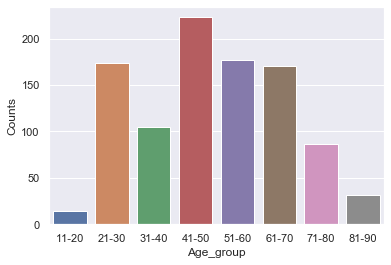

In [31]:
sns.barplot(new_cust['Age_group'].value_counts().index, new_cust['Age_group'].value_counts().values, 
                ci = None)
plt.xlabel('Age_group')
plt.ylabel('Counts')
plt.show()

Majority of the new customers are in the Age Group of 41 to 50 years with a very less number in 11 to 20 years and 81 to 90 years.

### Customer Demographics

In [32]:
c_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [33]:
c_demo.shape

(4000, 13)

In [34]:
c_demo.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [35]:
c_demo.dtypes

customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
default                                        object
owns_car                                       object
tenure                                        float64
dtype: object

In [36]:
for features in c_demo.columns:
    print(features,': ' ,c_demo[features].unique())
    print('-' * 100)

customer_id :  [   1    2    3 ... 3998 3999 4000]
----------------------------------------------------------------------------------------------------
first_name :  ['Laraine' 'Eli' 'Arlin' ... 'Stephie' 'Rusty' 'Sarene']
----------------------------------------------------------------------------------------------------
last_name :  ['Medendorp' 'Bockman' 'Dearle' ... 'Halgarth' 'Woolley' 'Oldland']
----------------------------------------------------------------------------------------------------
gender :  ['F' 'Male' 'Female' 'U' 'Femal' 'M']
----------------------------------------------------------------------------------------------------
past_3_years_bike_related_purchases :  [93 81 61 33 56 35  6 31 97 49 99 58 38 85 91 57 79 76 72 74 43 55 12 37
  5 62 18  3 17 44 59 40 46 64 24 63 98 51 68 22  2 48 87 26 60 47 73 21
 67 16 78 30 94 28 20 11  1 75 41 69 19 80 83 25 54  4 23 65 88 10 77  9
 82 27 53 32 34 71 36 90 95  8 39  7 42 13 45 50 14 89 84 96 70 66  0 15
 86 92 29 52]


Observations

- This is our master customer table and in this customer_id are till 4000, however in transactions table we had seen some IDs greater than 4000 after removing them we get ids of customers till 3500 only who have made transactions so we will remove and use IDs only upto 3500.
- In the gender feature Male and Female are entered in different ways, we will make them consistent and remove U category.
- In the deceased indicator feature will remove deceased customers as they cannot provide any value in the future.
- The default feature is incomprehensible will drop this feature.

In [37]:
ie = c_demo[c_demo['customer_id'] > 3500].index
c_demo.drop(ie, axis = 0, inplace = True)

In [38]:
c_demo['customer_id'].describe()

count    3500.000000
mean     1750.500000
std      1010.507298
min         1.000000
25%       875.750000
50%      1750.500000
75%      2625.250000
max      3500.000000
Name: customer_id, dtype: float64

In [39]:
c_demo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              112
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     76
job_title                              426
job_industry_category                  561
wealth_segment                           0
deceased_indicator                       0
default                                255
owns_car                                 0
tenure                                  76
dtype: int64

In [40]:
# Drop default feature
c_demo.drop('default', axis = 1, inplace = True)
# Forward Fill null values in DOB feature
c_demo['DOB'] = c_demo['DOB'].ffill()
# Fill tenure with median
c_demo['tenure'].fillna(c_demo['tenure'].median(), inplace = True)
# For rest of features fill null values with None
for features in c_demo.columns:
    if (c_demo[features].isnull().sum() > 1) & (c_demo[features].dtype == 'O'):
        c_demo[features].fillna('None', inplace = True)

In [41]:
c_demo['gender'] = c_demo['gender'].replace('M', 'Male')
c_demo['gender'] = c_demo['gender'].replace('F', 'Female')
c_demo['gender'] = c_demo['gender'].replace('Femal', 'Female')

In [42]:
c_demo['gender'].value_counts()

Female    1764
Male      1659
U           77
Name: gender, dtype: int64

In [43]:
dx = c_demo[c_demo['gender'] == 'U'].index
c_demo.drop(dx, axis = 0, inplace = True)

In [44]:
# dropping deceased customers
dec = c_demo[c_demo['deceased_indicator'] == 'Y']
c_demo = c_demo.drop(dec.index, axis = 0)

In [45]:
# Create Age feature from DOB
now = pd.to_datetime('now')
c_demo['Age'] = now.year - c_demo['DOB'].dt.year - ((now.month -c_demo['DOB'].dt.month) < 0)
# We can now create a new feature Age Group
c_demo['Age_group'] = pd.cut(c_demo['Age'], bins = [10, 20, 30, 40, 50, 60, 70, 80, 90], 
                    labels = ['11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90'])

In [46]:
c_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,Age_group
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,67,61-70
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,40,31-40
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,67,61-70
3,4,Talbot,None,Male,33,1961-10-03,None,IT,Mass Customer,N,No,7.0,59,51-60
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,None,Affluent Customer,N,Yes,8.0,44,41-50


In [47]:
feats = ['gender' ,'job_title', 'job_industry_category', 'wealth_segment', 'Age_group']
for i in feats:
    print((c_demo[i].value_counts(normalize = True) * 100).round(2))
    print('-' * 100)

Female    51.52
Male      48.48
Name: gender, dtype: float64
----------------------------------------------------------------------------------------------------
None                                    12.27
Business Systems Development Analyst     1.11
Social Worker                            1.05
Tax Accountant                           1.05
Legal Assistant                          1.02
                                        ...  
Health Coach III                         0.06
Health Coach I                           0.06
Geologist II                             0.06
Research Assistant III                   0.06
Developer I                              0.03
Name: job_title, Length: 196, dtype: float64
----------------------------------------------------------------------------------------------------
Manufacturing         20.51
Financial Services    19.99
None                  16.39
Health                15.34
Retail                 8.94
Property               6.75
IT                

Observations

- Approx 70% of customers belong to Manufacturing, Financial Services, None and Health industries.
- Half of the customers are Mass customers.
- One third customers are in the age group of 41 to 50 years and age group of 31 to 50 years comprises more than 50% of the customers.

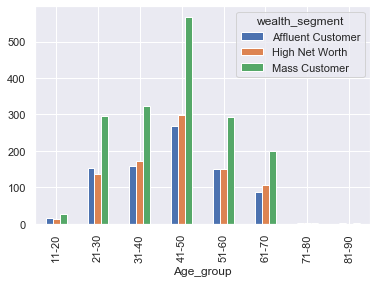

In [48]:
# wealth segment and Age group
grp = c_demo.groupby(['wealth_segment', 'Age_group'])['customer_id'].count()
grp.unstack(0).plot.bar()
plt.show()

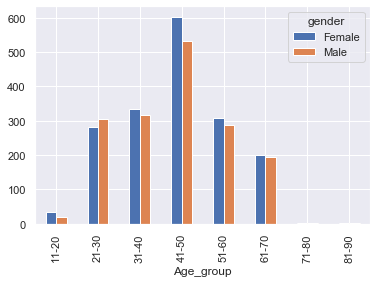

In [49]:
# gender and Age group
grp_g = c_demo.groupby(['gender', 'Age_group'])['customer_id'].count()
grp_g.unstack(0).plot.bar()
plt.show()

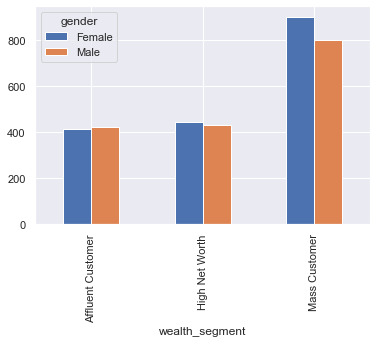

In [50]:
# gender and wealth segment
grp = c_demo.groupby(['gender', 'wealth_segment'])['customer_id'].count()
grp.unstack(0).plot.bar()
plt.show()

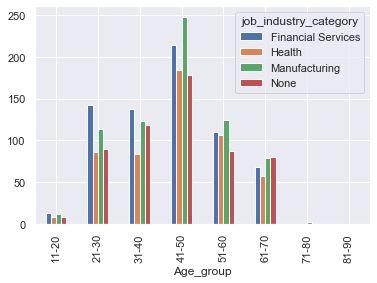

In [51]:
# Top 4 industry category and Age group
jic = c_demo[(c_demo['job_industry_category'] == 'Manufacturing') | 
             (c_demo['job_industry_category'] == 'Financial Services') |
             (c_demo['job_industry_category'] == 'None') |
              (c_demo['job_industry_category'] == 'Health')]
grp_j = jic.groupby(['job_industry_category', 'Age_group'])['customer_id'].count()
grp_j.unstack(0).plot.bar()
plt.show()

In the age group of 21 to 40 years customers in Financial services are more than that in manufacturing while in age group of 41 to 60 years no. of customers in manufacturing exceeds the people in Financial Services.

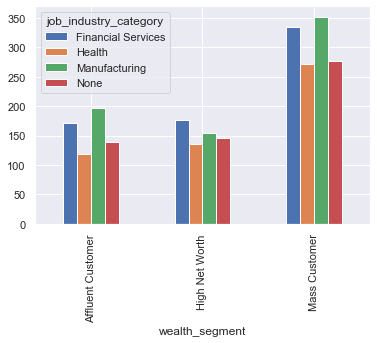

In [52]:
# industry category and wealth segment
jic.groupby(['job_industry_category', 'wealth_segment'])['customer_id'].count().unstack(0).plot.bar()
plt.show()

High net worth wealth segment is an exception where customers in Financial services are more than customers in Manufacturing.

In [53]:
c_add.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [54]:
c_add.dtypes

customer_id            int64
address               object
postcode               int64
state                 object
country               object
property_valuation     int64
dtype: object

In [55]:
for features in c_add.columns:
    print(features , ': ',c_add[features].unique())
    print('-' * 100)

customer_id :  [   1    2    4 ... 4001 4002 4003]
----------------------------------------------------------------------------------------------------
address :  ['060 Morning Avenue' '6 Meadow Vale Court' '0 Holy Cross Court' ...
 '87 Crescent Oaks Alley' '8194 Lien Street' '320 Acker Drive']
----------------------------------------------------------------------------------------------------
postcode :  [2016 2153 4211 2448 3216 2210 2650 2023 3044 4557 3799 2760 2428 3331
 3058 2135 2233 2444 4413 4740 3218 4868 4116 2519 2756 2170 4005 4127
 2535 4726 4805 2212 2207 3350 3931 4018 4670 2480 3212 2322 3198 2047
 4503 2145 4350 2142 2029 2127 4280 2166 2046 2026 2765 2749 2745 3752
 2217 2230 3046 3183 2070 2213 4208 2774 4133 4213 4170 2073 3561 2330
 3977 2204 2086 2226 2075 2038 2069 2100 3133 3070 2777 2125 2766 2209
 2160 2065 2150 2168 4171 2155 2517 2096 2750 2093 3204 4300 3844 4226
 3192 2485 2097 4817 2516 3074 4508 4405 2452 2205 4132 4744 2158 3201
 4178 2112 2033 4401 31

Observations

- In customer address table also there are few IDs greater than 3500 we will remove them.
- Name of states are not consistent example New South Wales and NSW, make them consistent.

In [56]:
ir = c_add[c_add['customer_id'] > 3500].index
c_add.drop(ir, axis = 0, inplace = True)

In [57]:
c_add['customer_id'].describe()

count    3496.000000
mean     1752.486270
std      1009.376288
min         1.000000
25%       878.750000
50%      1752.500000
75%      2626.250000
max      3500.000000
Name: customer_id, dtype: float64

In [58]:
c_add.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

There are no null values.

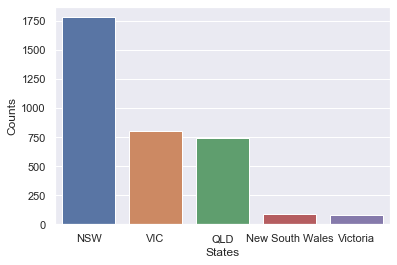

In [59]:
sns.barplot(c_add['state'].value_counts().index, c_add['state'].value_counts().values, ci = None)
plt.xlabel('States')
plt.ylabel('Counts')
plt.show()

We will make New South Wales as NSW and Victoria as VIC.

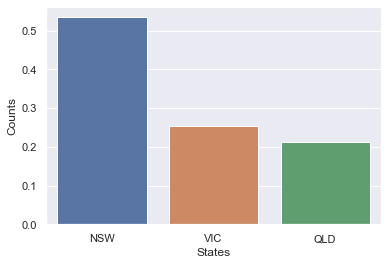

In [60]:
c_add['state'] = c_add['state'].replace('New South Wales', 'NSW')
c_add['state'] = c_add['state'].replace('Victoria', 'VIC')
sns.barplot(c_add['state'].value_counts().index, c_add['state'].value_counts(normalize = True).values,
                                                             ci = None)
plt.xlabel('States')
plt.ylabel('Counts')
plt.show()

More than 50% of customers belong to NSW state.

In [61]:
# Merge transactions and customer demographics table.
df = pd.merge(tranx, c_demo, on = 'customer_id', how = 'left')
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,Age_group
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,19.0,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,66.0,61-70
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,89.0,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,42.0,41-50
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,9.0,1977-06-03,Desktop Support Technician,Retail,Affluent Customer,N,No,22.0,44.0,41-50
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,83.0,1962-01-14,Staff Scientist,Financial Services,Mass Customer,N,No,16.0,59.0,51-60
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,29.0,1996-12-15,None,Retail,Affluent Customer,N,Yes,2.0,24.0,21-30


In [62]:
(df['transaction_date'].max()).date()

datetime.date(2017, 12, 30)

In [63]:
df.isnull().sum()

transaction_id                           0
product_id                               0
customer_id                              0
transaction_date                         0
online_order                             0
order_status                             0
brand                                    0
product_line                             0
product_class                            0
product_size                             0
list_price                               0
standard_cost                            0
product_first_sold_date                  0
Profit                                   0
first_name                             463
last_name                              463
gender                                 463
past_3_years_bike_related_purchases    463
DOB                                    463
job_title                              463
job_industry_category                  463
wealth_segment                         463
deceased_indicator                     463
owns_car   

In [64]:
# Drop null values
df = df.dropna()

In [65]:
# Create two new features Recency and Frequency
gf = df.groupby('customer_id')['product_id'].count().reset_index()
# For recency first we will create new feature that is number of days since last purchase as compared 
# last transaction in record that is 30/12/2017
df['dpu'] = (df['transaction_date'].max() - df['transaction_date']).dt.days
gr = df.groupby('customer_id')['dpu'].min().reset_index()
gp = df.groupby('customer_id')['Profit'].sum().reset_index()

In [66]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,Age_group,dpu
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,66.0,61-70,308
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,42.0,41-50,223
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,1977-06-03,Desktop Support Technician,Retail,Affluent Customer,N,No,22.0,44.0,41-50,75
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,1962-01-14,Staff Scientist,Financial Services,Mass Customer,N,No,16.0,59.0,51-60,121
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,1996-12-15,None,Retail,Affluent Customer,N,Yes,2.0,24.0,21-30,90


In [67]:
gf

,customer_id,product_id
0,1,11
1,2,3
2,3,8
3,4,2
4,5,6
...,...,...
3410,3496,4
3411,3497,3
3412,3498,6
3413,3499,7


In [68]:
gr

,customer_id,dpu
0,1,7
1,2,128
2,3,102
3,4,195
4,5,16
...,...,...
3410,3496,256
3411,3497,52
3412,3498,127
3413,3499,51


In [69]:
gp

,customer_id,Profit
0,1,3018.09
1,2,2226.26
2,3,3362.81
3,4,220.57
4,5,2394.94
...,...,...
3410,3496,2045.84
3411,3497,1648.32
3412,3498,3147.33
3413,3499,4955.25


In [70]:
a = pd.merge(gr, gf, on = 'customer_id', how = 'inner')

In [71]:
b = pd.merge(a, gp, on = 'customer_id', how = 'inner')
b = b.rename(columns = {'dpu' : 'Recency', 'product_id' : 'Frequency', 'Profit' : 'Monetary'})
c = b.copy()
d = b.set_index('customer_id')
d

,Recency,Frequency,Monetary
customer_id,,,
1,7,11,3018.09
2,128,3,2226.26
3,102,8,3362.81
4,195,2,220.57
5,16,6,2394.94
...,...,...,...
3496,256,4,2045.84
3497,52,3,1648.32
3498,127,6,3147.33


In [72]:
# Scale RFM
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
cluster_scale = minmax.fit_transform(d)
cluster_scale = pd.DataFrame(cluster_scale)
cluster_scale.columns = d.columns

### Kmeans

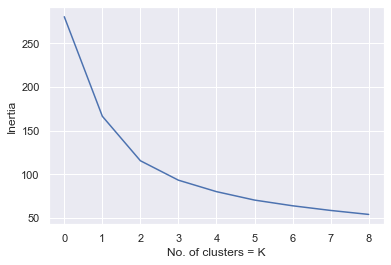

In [73]:
from sklearn.cluster import KMeans
# plot elbow curve
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters)
    model_clus.fit(cluster_scale)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)
plt.xlabel('No. of clusters = K')
plt.ylabel('Inertia')
plt.show()

In [80]:
cluster_kmean = KMeans(n_clusters=3,random_state=0).fit(cluster_scale)
d['clusters'] = cluster_kmean.labels_

In [88]:
d.groupby('clusters').mean()

,Recency,Frequency,Monetary
clusters,,,
0,41.792453,4.769458,2362.593178
1,163.676626,3.594025,1876.439350
2,38.845217,8.173913,4946.401009


Cluster 2 has the lowest mean recency, highest mean frequency and highest mean profit so our high net worth customers lie in cluster 0. Now we will concat labels to the main dataframe and filter out our top customers and check their characteristics.

In [86]:
d.drop('labels', axis = 1, inplace = True)

In [87]:
d

,Recency,Frequency,Monetary,clusters
customer_id,,,,
1,7,11,3018.09,2
2,128,3,2226.26,1
3,102,8,3362.81,2
4,195,2,220.57,1
5,16,6,2394.94,0
...,...,...,...,...
3496,256,4,2045.84,1
3497,52,3,1648.32,0
3498,127,6,3147.33,1


In [110]:
ni = set(c_demo['customer_id']) - set(d.index)
print(ni)
nil = list(ni)
print(nil)

{2660, 869, 3236, 852, 3229, 2074, 1373}
[2660, 869, 3236, 852, 3229, 2074, 1373]


In [ ]:
c_demo.drop(nil, axis = 0, inplace = True)

In [101]:
# Add new column clusters in customer demographics dataframe
c_demo['clusters'] = cluster_kmean.labels_
c_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,Age_group,clusters
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,67,61-70,2
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,40,31-40,1
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,67,61-70,2
3,4,Talbot,None,Male,33,1961-10-03,None,IT,Mass Customer,N,No,7.0,59,51-60,1
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,None,Affluent Customer,N,Yes,8.0,44,41-50,0


In [102]:
# filter out cluster 2 customers. These are our high value customers.
cl = c_demo[c_demo['clusters'] == 2]

In [104]:
print('no. of customers in cluster 2 are: {}'.format(cl.shape[0]))

no. of customers in cluster 2 are: 1150


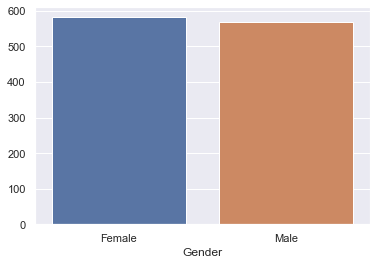

In [105]:
sns.barplot(cl.gender.value_counts().index, cl.gender.value_counts().values, ci = None)
plt.xlabel('Gender')
plt.show()

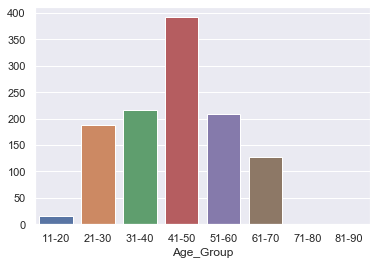

In [106]:
sns.barplot(cl.Age_group.value_counts().index, cl.Age_group.value_counts().values, ci = None)
plt.xlabel('Age_Group')
plt.show()

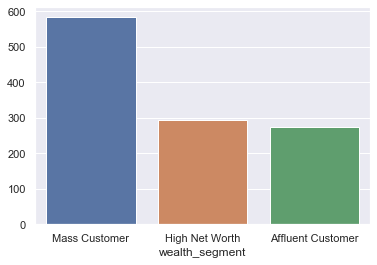

In [107]:
sns.barplot(cl.wealth_segment.value_counts().index, cl.wealth_segment.value_counts().values, ci = None)
plt.xlabel('wealth_segment')
plt.show()

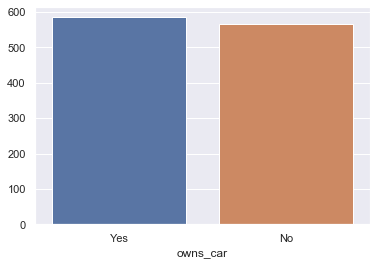

In [108]:
sns.barplot(cl.owns_car.value_counts().index, cl.owns_car.value_counts().values, ci = None)
plt.xlabel('owns_car')
plt.show()

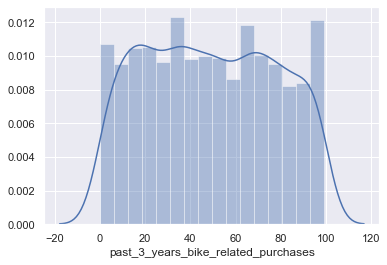

In [109]:
sns.distplot(c_demo.past_3_years_bike_related_purchases)
plt.show()